In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

khai báo dữ liệu

In [ ]:
data = pd.read_csv("data\csgo_round_snapshots.csv")
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,T

Miêu tả dữ liệu: 
dữ liệu gồn 122410 hàng và 97 cột. Tương ứng với 122410 ván đấu và 96 đặc trưng của mẫu dữ liệu. Cột cuối cùng thể hiện kết quả ván đấu và ta dùng nó làm mục tiêu để dự đoán

In [6]:
data.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

Các đặc trưng của mẫu dữ liệu:

In [7]:
data.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

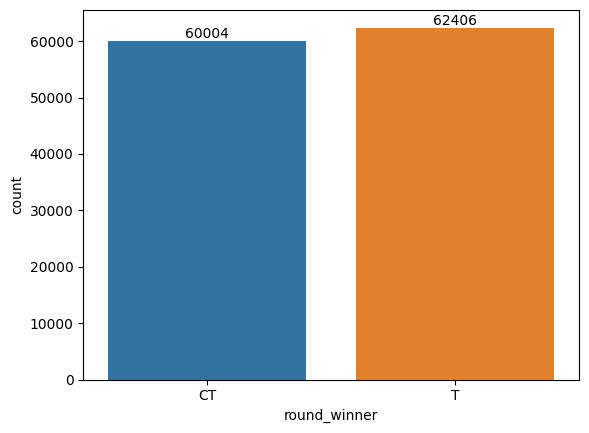

In [8]:
ax = sns.countplot(x = 'round_winner',data = data)
for i in ax.containers:
    ax.bar_label(i,)

Biểu đề thể hiện số ván thắng của bên phía CT và T. Cũng là số lượng các mẫu thử thể hiện cho chiến thắng của 2 bên. Ta có thể thấy số lượng mẫu thử khá là cân bằng.

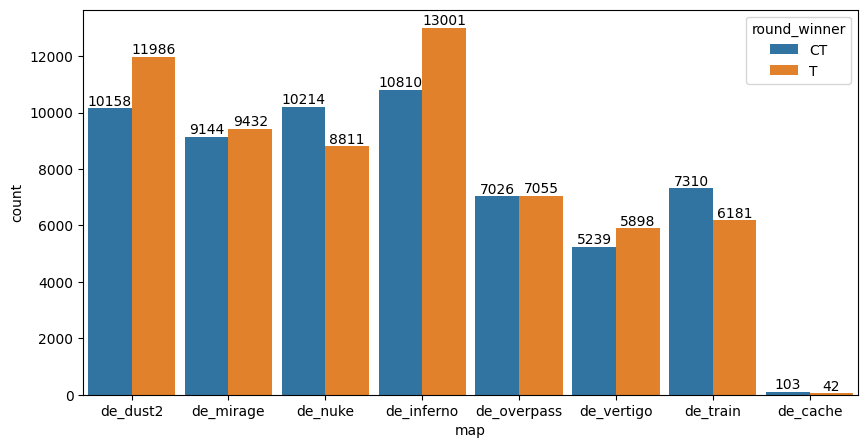

In [9]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'map',hue = 'round_winner',data = data,width = 0.9)
for i in ax.containers:
    ax.bar_label(i,)

Biểu đồ thể hiện cho ván thắng của cả 2 bên ở trên các bản đồ thi đấu khác nhau. Nhìn đây ta có thể rút ra vài điều.

* Map cache có số lượng mẫu thử rất ít. Điều này khá là dễ giải thích vì map đấu này đã bị loại khỏi danh sách map thi đấu chuyên nghiệp nên người chơi cũng như tuyển thủ đều bắt đầu lãng quên map thi đấu này.
* Hầu hết các map thi đấu đều có tỉ lệ người chơi thuộc phe T thằng nhiều hơn. Map đấu có số ván thắng lệch cho phía T nhất là map thi đấu inferno.
* Trong khi đó map overpass là map thi đấu là khá cân bằng cho cả 2 bên.
* Map thi đấu nuke và train có số ván thắng bên phía CT nhiều hơn T site. Lý do bởi vì 2 map thi đấu này thiết kế có nhiều thuận lợi cho bên phía CT

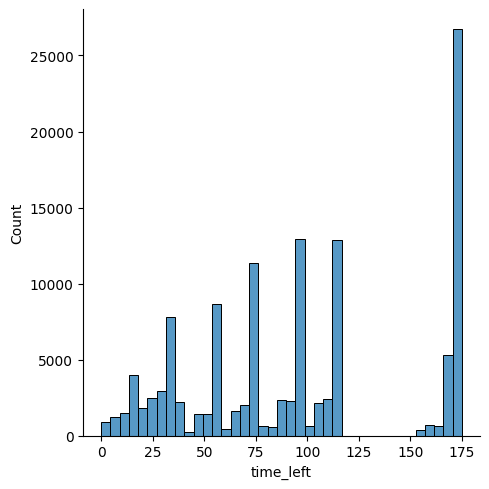

In [10]:
sns.displot(data['time_left'] , kde = False)

Biểu đồ thể hiện thời gian còn lại trong một ván đấu. Ta có thể thấy được khoảng thời gian 175s có nhiều mẫu dữ liệu hơn vì chúng ta sẽ luôn muốn dự đoán kết quả vào thời điểm bắt đầu trận đấu.


In [11]:
Ct_win = data[data['round_winner'] == 'CT']

In [14]:
T_win = data[data['round_winner'] == 'T']

In [12]:
bomb_planted_CT = Ct_win['bomb_planted'].value_counts()

In [15]:
bomb_planted_T = T_win['bomb_planted'].value_counts()

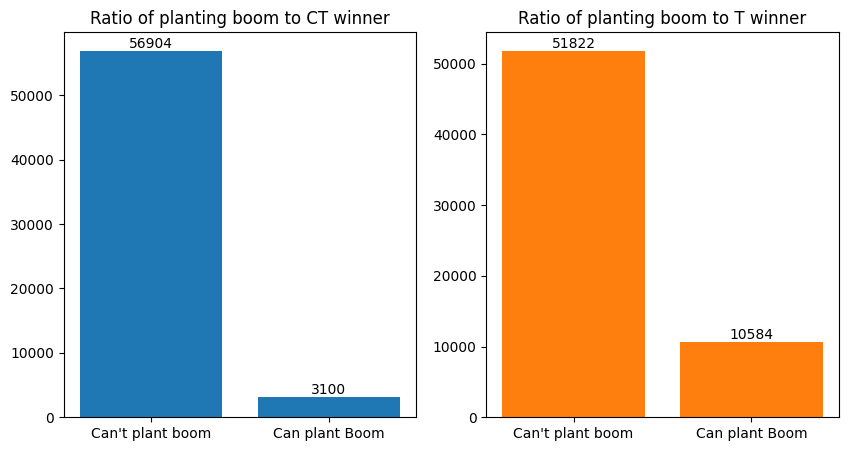

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].bar(["Can't plant boom",'Can plant Boom'],list(bomb_planted_CT))
ax[0].set_title("Ratio of planting boom to CT winner")
for i in ax[0].containers:
    ax[0].bar_label(i,)

ax[1].bar(["Can't plant boom",'Can plant Boom'],list(bomb_planted_T),color = '#ff7f0e')
ax[1].set_title("Ratio of planting boom to T winner")

for i in ax[1].containers:
    ax[1].bar_label(i,)

Biểu đồ cho thấy số ván thắng ở 2 bên CT và T.

* Bên phía CT ta có thể thấy hầu như chiến thắng là đều dựa vào việc tiêu diệt đối thủ ở bên kia trước thay vì ưu tiên đặt được quả C4.

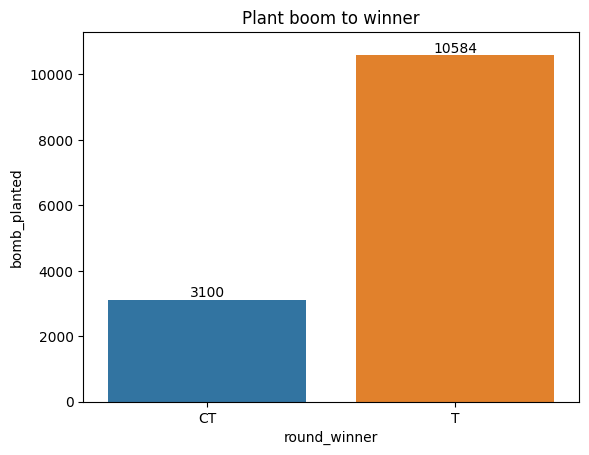

In [17]:
ax = sns.barplot(x = 'round_winner', y = 'bomb_planted', data = data,estimator='sum', errwidth=0)
plt.title("Plant boom to winner")

for i in ax.containers:
    ax.bar_label(i,)

Biểu đồ trên thể hiện số lượng ván thắng T và CT nhờ việc đặt và gỡ boom

* Ta có thể thấy khả năng CT win nhờ đặt được boom là thấp. Tỉ lệ chỉ vào khoảng 23%. Nên việc của người chơi phía CT là ngăn chặn tối đa việc bên T đặt được C4. Ngược lại người chơi bên T cố gắng đặt được quả boom C4 để tối đa được khả năng chiến thắng.

<Figure size 800x800 with 0 Axes>

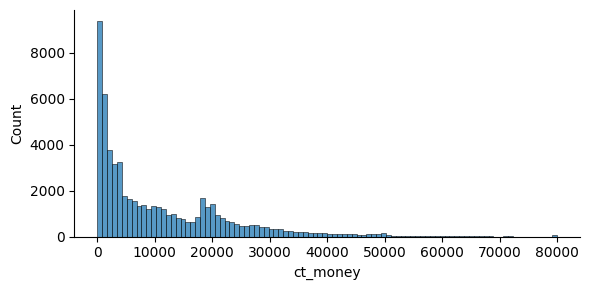

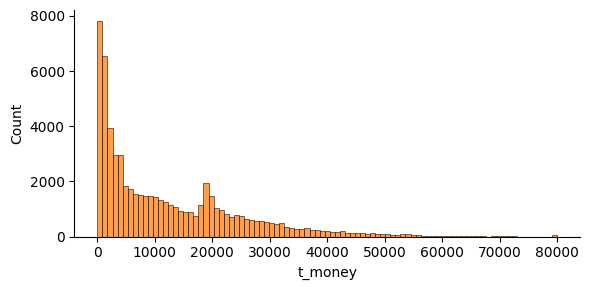

In [18]:
plt.figure(figsize=(8,8))

ax1 = sns.displot(x = 'ct_money', data = Ct_win,aspect= 2,height= 3)
ax2 = sns.displot(x = 't_money', data = T_win,aspect= 2,height= 3,color = '#ff7f0e')

Biểu đồ cho thấy số tiền còn dư khi ván đấu bắt đầu. Ta có thể có một số nhận xét
* Cả 2 bên T và CT đều có số lượng chiến thằng khi mua hết tiền là cao. Nghĩa là cả 2 đội đều đủ trang bị
* Càng về sau số số tiền càng giảm, chứng tỏ rằng nếu càng mua ít trang bị tỉ lệ thằng càng giảm. Điều đó chứng tỏ được việc số tiền đã tiêu ảnh hưởng đến tỉ lệ chiến thắng
* Một điều đặc biệt là có một số trận thắng ở mức tiền cao nhất. Tức là cả đội đều có max tiền 16k và không mua gì cả. Điều này thể hiện có những trận đấu một chiều, họ không cần tiêu tiền vẫn đủ trang bị.

In [19]:
f = lambda x :['t_weapon' in i and 'ct' not in i for i in x ]

In [20]:
f1 = lambda x :['ct_weapon' in i for i in x ]

In [21]:
ct_weapon = data.columns[f1(data.columns)]

In [22]:
t_weapon = data.columns[f(data.columns)]

In [23]:
weapon_in_ct = ct_weapon.map(lambda x :x.split('_')[2])

In [26]:
weapon_in_t = t_weapon.map(lambda x :x.split('_')[2])

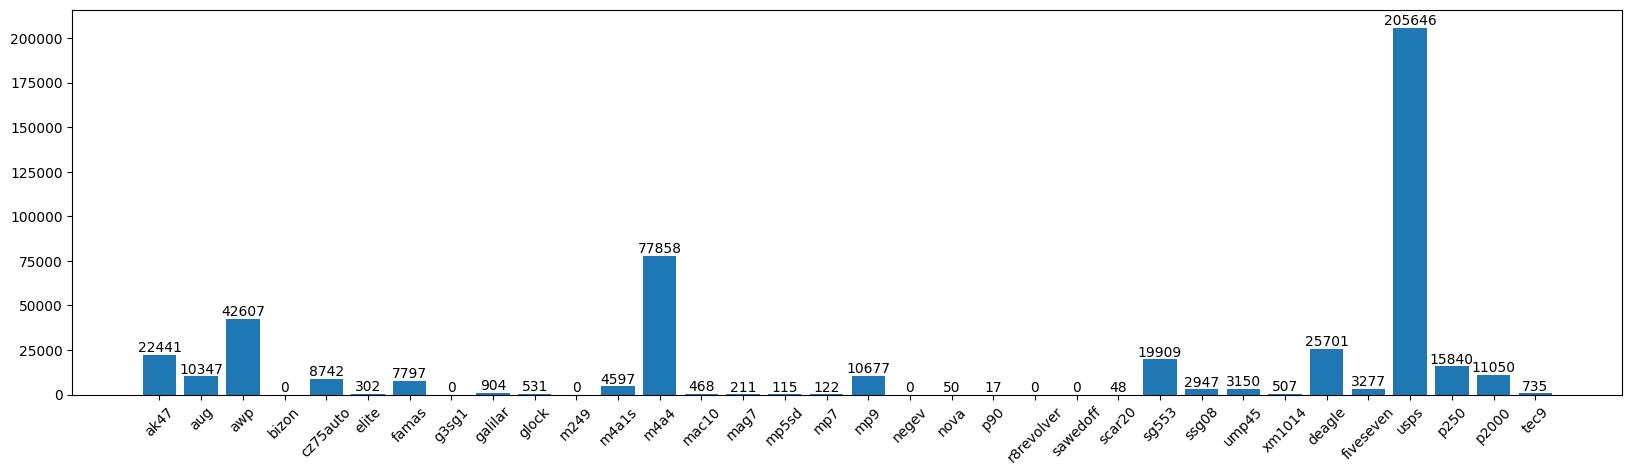

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(20, 5))
plt.xticks(rotation=45)
ax1.bar(weapon_in_ct, Ct_win[ct_weapon].sum())

for i in ax1.containers:
    ax1.bar_label(i,)

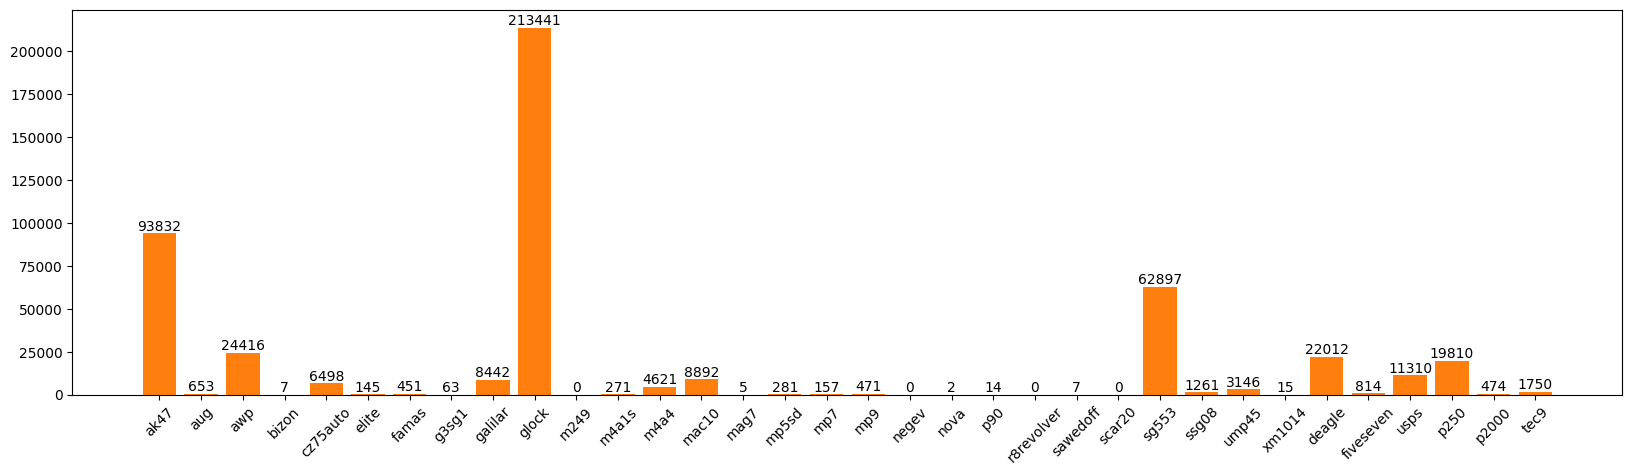

In [28]:
fig, ax1 = plt.subplots(1,1, figsize=(20, 5))
plt.xticks(rotation=45)
ax1.bar(weapon_in_t,T_win[t_weapon].sum(),color = '#ff7f0e' )

for i in ax1.containers:
    ax1.bar_label(i,)

2 đồ thị trên là về vũ khí mà mỗi bên sử dụng, ta có thể thấy:
- glock và usps được sử dụng nhiều nhất vì đây là vũ khí mặc định, không mất tiền mua.
- ak47 và m4a4 có số lượng khá cao vì đây là 2 vũ khí được đánh giá cao trong trò chơi.
- có một số vũ khí có số lượng sử dụng là 0 vì không phù hợp với chiến thuật hiện nay, khi tiền xử lí dữ liệu ta sẽ bỏ những cột này đi để giảm thiểu số chiều cho dữ liệu.

In [29]:
T_win = data[data['round_winner'] == 'T']

In [30]:
weapon_in_t = t_weapon.map(lambda x :x.split('_')[2])

In [31]:
t_weapon

Index(['t_weapon_ak47', 't_weapon_aug', 't_weapon_awp', 't_weapon_bizon',
       't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas',
       't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_glock', 't_weapon_m249',
       't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7',
       't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 't_weapon_negev',
       't_weapon_nova', 't_weapon_p90', 't_weapon_r8revolver',
       't_weapon_sawedoff', 't_weapon_scar20', 't_weapon_sg553',
       't_weapon_ssg08', 't_weapon_ump45', 't_weapon_xm1014',
       't_weapon_deagle', 't_weapon_fiveseven', 't_weapon_usps',
       't_weapon_p250', 't_weapon_p2000', 't_weapon_tec9'],
      dtype='object')

In [32]:
x = data['ct_score'].value_counts()

In [33]:
data['ct_score'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32.])

In [34]:
nade = ['t_grenade_hegrenade',
       't_grenade_flashbang',
       't_grenade_smokegrenade',
       't_grenade_incendiarygrenade',
       't_grenade_molotovgrenade',
       't_grenade_decoygrenade']

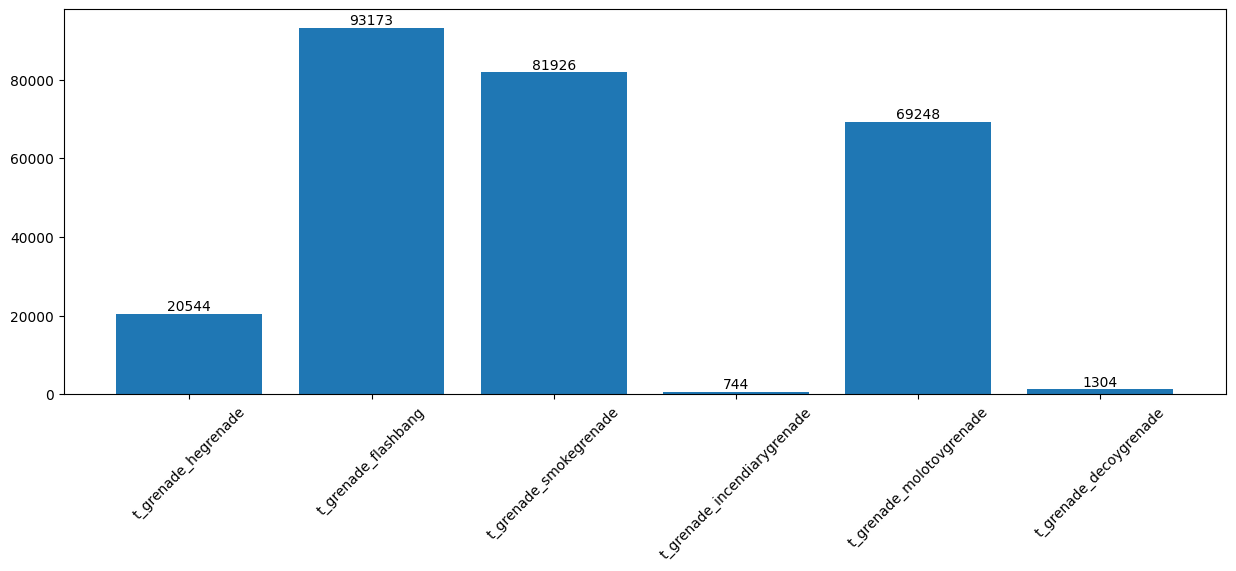

In [35]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 5))
plt.xticks(rotation=45)
ax1.bar(nade, Ct_win[nade].sum())

for i in ax1.containers:
    ax1.bar_label(i,)

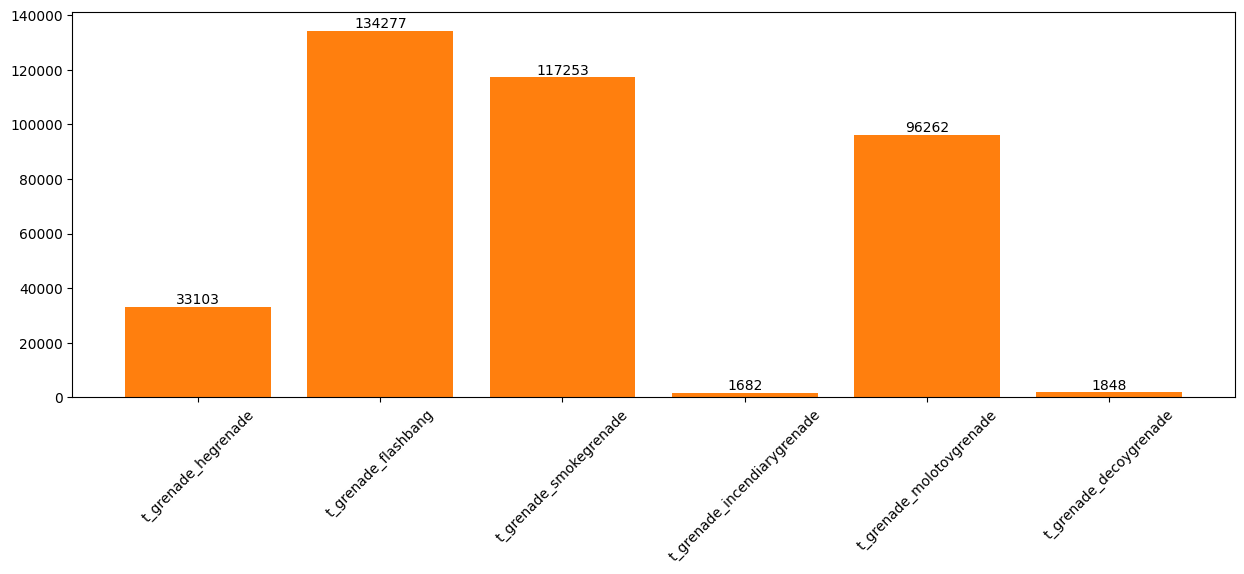

In [36]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 5))
plt.xticks(rotation=45)
ax1.bar(nade, T_win[nade].sum(),color = '#ff7f0e')
for i in ax1.containers:
    ax1.bar_label(i,)

Tỉ lệ boom được 2 bên sử dụng. Rõ ràng những quả Flash cho thấy độ hiệu quả trong việc chiến thắng của 2 bên. Tiếp theo là những quả smoke, quả boom lửa. Đây thực sự là những trang bị thiết thực dành cho cả 2 bên để dành lấy chiến thắng

<Axes: xlabel='t_grenade_flashbang', ylabel='count'>

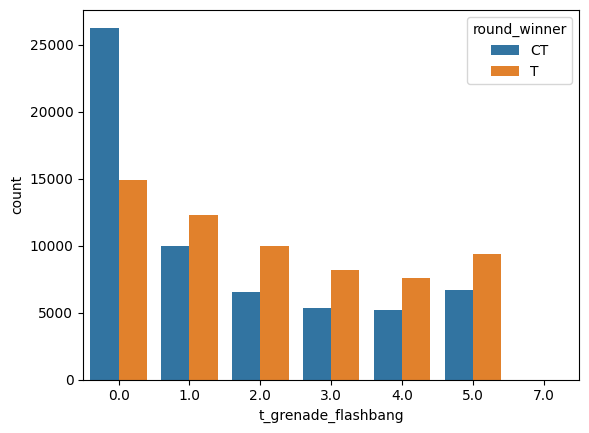

In [37]:
sns.countplot(x = 't_grenade_flashbang' ,hue = 'round_winner',data = data)

Thật vậy, tỉ lệ những quả flash có ở 2 bên. Nếu mà không có quả flash nào trong người thì CT site sẽ có lợi thế. Lợi thế này giảm dần khi mà bên T bắt đầu có những quả flash